###Wikidata wars

I was hoping to get some interesting war information from https://www.wikidata.org/wiki/Wikidata:Main_Page. I gathered all instances of war available there and summarised it here. Unfortunately, there is too much missing data to make any meaningful observations. What we see really reflects the subjective nature of how wars are defined and recorded in Wikidata.Currently, Wikidata is not a reliable source of information about wars.

Below, I've done some data transformations and investigated what could be done with it (not much).

In [1]:
##warDataWikiData
import pandas as pd
df = pd.read_csv('warDataWikiData.csv')
df.head()

,event,eventLabel,date,start_date,end_date,countryLabel,locationLabel,participantLabel,biggerWarInstanceLabel,smallerWarInstanceLabel,casualties,isReligious,isCivil
0,http://www.wikidata.org/entity/Q184637,Ten Years' War,1868-10-10T00:00:00Z,1868-10-10T00:00:00Z,1878-01-01T00:00:00Z,NaN,Cuba,"Ejército Libertador Cubano, Spain under the Re...",history of Cuba,"Jagüey Grande uprising, Virginius Affair, Horn...",NaN,no,no
1,http://www.wikidata.org/entity/Q185729,War on Terror,NaN,2001-09-11T00:00:00Z,NaN,NaN,NaN,"Taliban, People's Republic of China, Islamic S...",NaN,"Iraq War, 2007 Lebanon conflict, Sectarian vio...",NaN,no,no
2,http://www.wikidata.org/entity/Q186284,Polish–Soviet War,1920-10-18T00:00:00Z,1919-02-01T00:00:00Z,1921-03-01T00:00:00Z,NaN,Central and Eastern Europe,"Second Polish Republic, Byelorussian Soviet So...",Russian Civil War,"Battle of Skorodno, Battle of Hrebionka, Battl...",NaN,no,no
3,http://www.wikidata.org/entity/Q186336,Dutch Revolt,1568-01-01T00:00:00Z,1568-01-01T00:00:00Z,1648-01-01T00:00:00Z,NaN,NaN,"Dutch Republic, Spanish Empire",NaN,"Battle of Lillo, Taking of Diest, Siege of Lingen",NaN,no,no
4,http://www.wikidata.org/entity/Q189266,Eastern Front,NaN,1941-06-22T00:00:00Z,"1945-05-07T00:00:00Z, 1955-01-21T00:00:00Z",Soviet Union,"Balkans, Eastern Europe, Northern Europe, Sovi...","Nazi Germany, Yugoslav Partisans, Kingdom of R...",Eastern European theatre of World War II,"Operation Kutuzov, Battles of Rzhev, Operation...",NaN,no,no


In [2]:
df.shape

(1877, 13)

In [3]:
#select top wars, those that don't have sub wars
top_wars = df[df.biggerWarInstanceLabel.isna()]

In [4]:
top_wars.shape

(1001, 13)

In [5]:
#select wars with at least one date
top_wars = top_wars[(top_wars.start_date.isna()==False) | (top_wars.end_date.isna()==False) | (top_wars.date.isna()==False)]
top_wars.shape

(762, 13)

In [6]:
top_wars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 1 to 1871
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   event                    762 non-null    object
 1   eventLabel               762 non-null    object
 2   date                     306 non-null    object
 3   start_date               678 non-null    object
 4   end_date                 666 non-null    object
 5   countryLabel             247 non-null    object
 6   locationLabel            441 non-null    object
 7   participantLabel         414 non-null    object
 8   biggerWarInstanceLabel   0 non-null      object
 9   smallerWarInstanceLabel  322 non-null    object
 10  casualties               9 non-null      object
 11  isReligious              762 non-null    object
 12  isCivil                  762 non-null    object
dtypes: object(13)
memory usage: 83.3+ KB


I need a custom function to convert dates to datetime as the pd.to_datetime function is unable to handle dates before 1677 or after 2262.

In [7]:
from datetime import datetime

def parse_date(date_str):
    try:
        return datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ")
    except ValueError:
        try:
            return datetime.strptime(date_str, "-%Y-%m-%dT%H:%M:%SZ")
        except ValueError:
            return None

top_wars['date_dt'] = top_wars['date'].apply(lambda x: parse_date(str(x)) if not pd.isnull(x) else pd.NaT)

In [8]:
top_wars['start_date_dt'] = top_wars['start_date'].apply(lambda x: parse_date(str(x)) if not pd.isnull(x) else pd.NaT)

In [9]:
top_wars['end_date_dt'] = top_wars['end_date'].apply(lambda x: parse_date(str(x)) if not pd.isnull(x) else pd.NaT)

Extract year from date: this is a very crude way of doing this, use start date or date or end date

In [10]:
def extract_year(row):
    if pd.notna(row['start_date_dt']):
        return row['start_date_dt'].year
    elif pd.notna(row['date_dt']):
        return row['date_dt'].year
    elif pd.notna(row['end_date_dt']):
        return row['end_date_dt'].year
    else:
        return None 

top_wars['extracted_year'] = top_wars.apply(extract_year, axis=1)

In [11]:
top_wars[top_wars['eventLabel']== 'Greek-Punic Wars']

,event,eventLabel,date,start_date,end_date,countryLabel,locationLabel,participantLabel,biggerWarInstanceLabel,smallerWarInstanceLabel,casualties,isReligious,isCivil,date_dt,start_date_dt,end_date_dt,extracted_year
417,http://www.wikidata.org/entity/Q1235331,Greek-Punic Wars,-1000-01-01T00:00:00Z,-0599-01-01T00:00:00Z,-0264-01-01T00:00:00Z,Roman Carthage,Sicily,"Ancient Carthage, Magna Graecia",NaN,"Battle of Chrysas, Battle of Gela, Battle of A...",NaN,no,no,1000-01-01 00:00:00,0599-01-01 00:00:00,0264-01-01 00:00:00,599.0


Tag BC, it starts with '-'

In [12]:
#top_wars['BC'] = top_wars['start_date'].str.startswith('-')
#return bc
def check_bc_date(row):
    return any(date.startswith('-') if isinstance(date, str) else False for date in row)

# Apply the function to create a new column 'bc'
top_wars['BC'] = top_wars[['start_date', 'end_date', 'date']].apply(check_bc_date, axis=1)

In [13]:
war_with_year = top_wars[top_wars['extracted_year'].isna() ==False]

In [19]:
import numpy as np

war_with_year['era'] = war_with_year['BC'].apply(lambda x: 'BC' if x else 'AD')
war_with_year['century'] = np.ceil(war_with_year.extracted_year / 100).astype(int)
war_with_year
# Group by both era and extracted_year
result = war_with_year.groupby(['era', 'century']).count()[['eventLabel']].reset_index()
result.rename(columns={'eventLabel': 'warCount'}, inplace=True)

result

C:\Users\karol\AppData\Local\Temp\ipykernel_34188\1447554843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_with_year['era'] = war_with_year['BC'].apply(lambda x: 'BC' if x else 'AD')
C:\Users\karol\AppData\Local\Temp\ipykernel_34188\1447554843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_with_year['century'] = np.ceil(war_with_year.extracted_year / 100).astype(int)


,era,century,warCount
0,AD,1,4
1,AD,2,2
2,AD,3,2
3,AD,4,3
4,AD,5,2
5,AD,6,11
6,AD,7,5
7,AD,8,5
8,AD,9,10
9,AD,10,7


I'd like to produce a graph showing number of wars by century. I need to use roman numerals for century values. The tics will cover

In [22]:
#!pip install roman

import roman
result['century_formatted'] = np.array(result['century'] - 0.5)
result['century_ticks'] = result['century'].apply(lambda x: roman.toRoman(int(x)))
result

,era,century,warCount,century_formatted,century_ticks
0,AD,1,4,0.5,I
1,AD,2,2,1.5,II
2,AD,3,2,2.5,III
3,AD,4,3,3.5,IV
4,AD,5,2,4.5,V
5,AD,6,11,5.5,VI
6,AD,7,5,6.5,VII
7,AD,8,5,7.5,VIII
8,AD,9,10,8.5,IX
9,AD,10,7,9.5,X


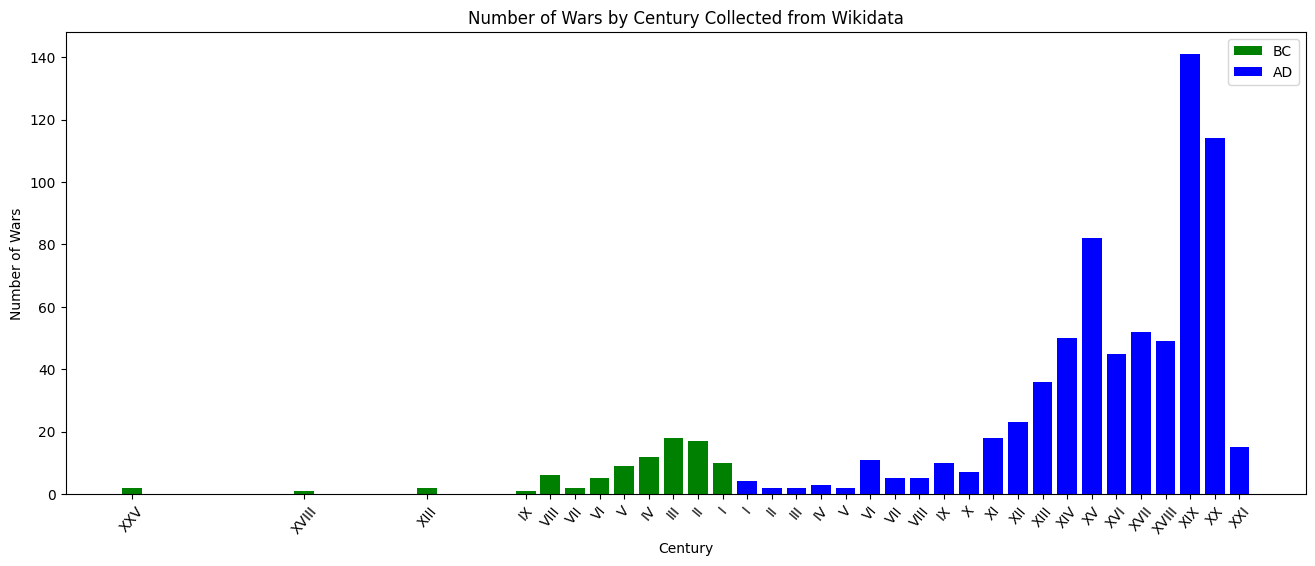

In [25]:
import matplotlib.pyplot as plt

# Bar plot for BC years
bc_data = result[result['era'] == 'BC']
ad_data = result[result['era'] == 'AD']

# Create a figure
plt.figure(figsize=(16, 6))

# Bar plot for BC years
plt.bar(-bc_data['century_formatted'], bc_data['warCount'], label='BC', color='green')

# Bar plot for AD years
plt.bar(ad_data['century_formatted'], ad_data['warCount'], label='AD', color='blue')

# Customize the plot
plt.xlabel('Century')
plt.ylabel('Number of Wars')
plt.title('Number of Wars by Century Collected from Wikidata')

# Manually set ticks and labels for both BC and AD
ticks_bc = list(-bc_data['century_formatted'])
labels_bc = list(bc_data['century_ticks'])

ticks_ad = list(ad_data['century_formatted'])
labels_ad = list(ad_data['century_ticks'])

# Combine BC and AD ticks and labels
ticks = ticks_bc + ticks_ad
labels = labels_bc + labels_ad

plt.xticks(ticks, labels, rotation=50) 

plt.legend()
#plt.grid(True)
plt.show()


Can we get insights about casualties?

In [26]:
c = top_wars[-top_wars['casualties'].isna()]

In [27]:
c['casualties'] = c['casualties'].astype(int)

C:\Users\karol\AppData\Local\Temp\ipykernel_34188\4155858522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['casualties'] = c['casualties'].astype(int)


In [28]:
c = c.sort_values(by='casualties', ascending=False)

In [29]:
c[['eventLabel', 'start_date', 'casualties']].head(10)

,eventLabel,start_date,casualties
1356,La Violencia,1949-12-06T00:00:00Z,200000
1363,Sri Lankan Civil War,1983-07-23T00:00:00Z,100000
742,Lithuanian Wars of Independence,1918-12-01T00:00:00Z,38000
1370,Boshin War,1868-01-27T00:00:00Z,8200
1361,Casamance conflict,1982-01-01T00:00:00Z,5000
559,Second Mafia War,1981-04-23T00:00:00Z,500
92,Appenzell Wars,1401-01-01T00:00:00Z,350
649,First Mafia War,1962-01-01T00:00:00Z,100
1177,Urtatagai conflict,1925-11-27T00:00:00Z,12


If we comare this to known casualties nuber we see there is a lot of missing data. Here is a better collection on this topic: #https://en.wikipedia.org/wiki/List_of_wars_by_death_toll

I'm abandoning this project and need to look for better data on global wars.